# Student Scores: Modeling

# Load Required Python Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pprint import pprint

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'total_student_scores_dummies.csv',
 '.ipynb_checkpoints']

# Load Data

In [4]:
df = pd.read_csv(parent+'/data/interim/total_student_scores_dummies.csv',index_col=0)

In [5]:
df.head()

,test preparation course,education,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,Grade
0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,pass
1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,pass
2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,pass
3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,fail
4,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,pass


In [6]:
df.shape

(10000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   test preparation course                         10000 non-null  int64 
 1   education                                       10000 non-null  int64 
 2   gender_female                                   10000 non-null  int64 
 3   gender_male                                     10000 non-null  int64 
 4   race/ethnicity_group A                          10000 non-null  int64 
 5   race/ethnicity_group B                          10000 non-null  int64 
 6   race/ethnicity_group C                          10000 non-null  int64 
 7   race/ethnicity_group D                          10000 non-null  int64 
 8   race/ethnicity_group E                          10000 non-null  int64 
 9   parental level of education_associate's degree  1000

In [8]:
df['Grade'].value_counts()

fail    5275
pass    4725
Name: Grade, dtype: int64

# Split into Train and Test Data

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Grade',axis=1)
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# examine data details
X.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,10000.0,0.3429,0.474702,0.0,0.0,0.0,1.0,1.0
education,10000.0,0.6181,0.485877,0.0,0.0,1.0,1.0,1.0
gender_female,10000.0,0.4960,0.500009,0.0,0.0,0.0,1.0,1.0
gender_male,10000.0,0.5040,0.500009,0.0,0.0,1.0,1.0,1.0
race/ethnicity_group A,10000.0,0.0825,0.275139,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group B,10000.0,0.1996,0.399720,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group C,10000.0,0.3145,0.464340,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group D,10000.0,0.2627,0.440123,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group E,10000.0,0.1407,0.347729,0.0,0.0,0.0,0.0,1.0
parental level of education_associate's degree,10000.0,0.1955,0.396605,0.0,0.0,0.0,0.0,1.0


# K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

## Evaluate K Using Train & Test Scores

In [12]:
# 1st method: Using Train and Test Scores, evaluate best K
# Results will be compared to results from error rate

test_scores = []
train_scores = []

for i in range(1,100):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

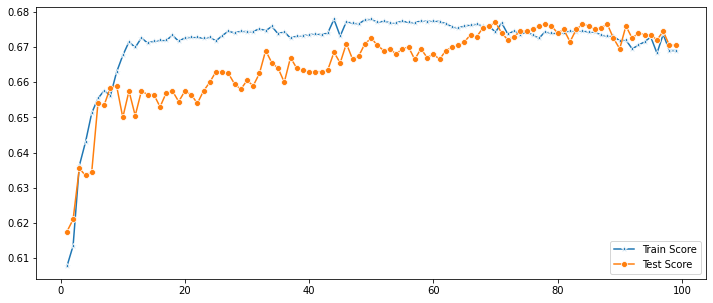

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

In [14]:
print(train_scores.index(max(train_scores))+1)

44


In [15]:
print(test_scores.index(max(test_scores))+1)

70


## Evaluate K Using Error Rate

In [16]:
# 2nd method: Using error rate, evaluate best k

error_rate = []

# range between 1 and sqrt(rows)
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

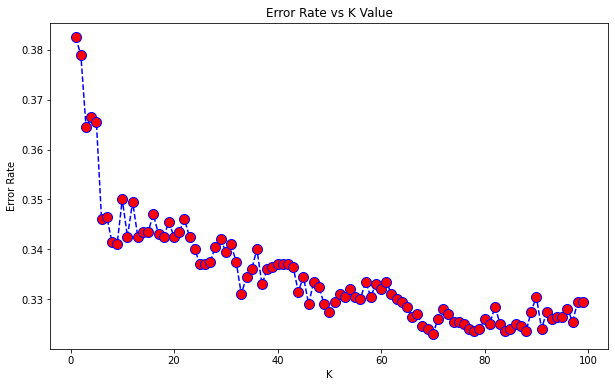

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
min_level = min(error_rate)

min_index = 0
for i in range(0,len(error_rate)):
    if error_rate[i] == min_level:
        min_index = i+1 #plus 1 due to knn starting at 1 and not 0 like a list

print('Minimum error rate is {} at index {}'.format(min_level,min_index))

Minimum error rate is 0.323 at index 70


In [19]:
knn = KNeighborsClassifier(min_index)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=70)

In [20]:
# generate predictions using the best-performing model
y_pred = knn.predict(X_test)
print("Accuracy: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 67.7%


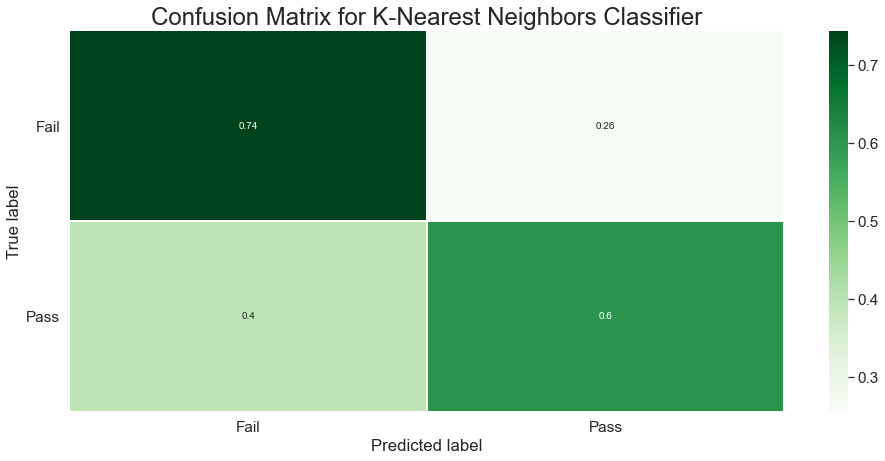

In [21]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fail','Pass']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier', size=24)
plt.show()

In [22]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fail       0.67      0.74      0.71      1041
        pass       0.68      0.60      0.64       959

    accuracy                           0.68      2000
   macro avg       0.68      0.67      0.67      2000
weighted avg       0.68      0.68      0.68      2000



# XGBoost with Base Hyperparameters

In [23]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

#y[y == 'fail'] = 0
#y[y == 'pass'] = 1

In [25]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X,label_encoded_y,test_size=0.2,random_state=42)

In [26]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = XGBClassifier(n_estimators=10, objective='binary:logistic',
                      seed=42, use_label_encoder=False)

# Fit the classifier to the training set
xg_cl.fit(X_trainB, y_trainB)

# Predict the labels of the test set: preds
y_predB = xg_cl.predict(X_testB)

# Compute the accuracy: accuracy
print("Accuracy: {}%".format(metrics.accuracy_score(y_testB, y_predB)*100))

[16:07:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 67.25%


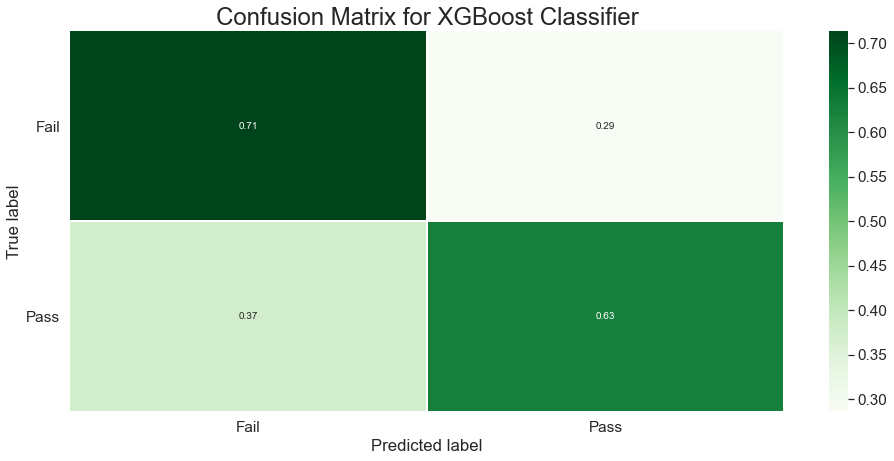

In [27]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_testB, y_predB)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fail','Pass']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Classifier', size=24)
plt.show()

In [28]:
# View the classification report for test data and predictions
print(classification_report(y_testB, y_predB))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1041
           1       0.67      0.63      0.65       959

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



In [29]:
feature_imp = pd.Series(xg_cl.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

lunch_free/reduced                                0.544339
test preparation course                           0.148776
education                                         0.079453
race/ethnicity_group E                            0.050041
parental level of education_some high school      0.030713
parental level of education_master's degree       0.026678
race/ethnicity_group D                            0.024860
gender_female                                     0.018649
parental level of education_some college          0.014358
parental level of education_bachelor's degree     0.013343
parental level of education_associate's degree    0.011544
race/ethnicity_group A                            0.011396
race/ethnicity_group B                            0.010722
race/ethnicity_group C                            0.008791
parental level of education_high school           0.006339
gender_male                                       0.000000
lunch_standard                                    0.0000

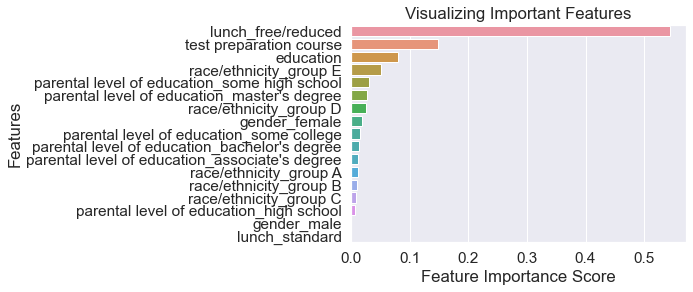

In [30]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# XGBoost with RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets

In [32]:
params = {
    'n_estimators': [10, 25, 50, 100, 200, 400],
    'min_child_weight':[1,2,5,10],
    'gamma':[0.5, 1, 1.5, 2, 5],
    'subsample':[0.6, 0.8, 1.0],
    'max_depth':[3, 4, 5, 6, 7, 8, None]
}

xgb = XGBClassifier(learning_rate=0.02,
                    objective='binary:logistic',
                    use_label_encoder=False)

gs = RandomizedSearchCV(xgb, param_distributions=params,
                        random_state=42, cv=5, verbose=3, n_jobs=-1)
model = gs.fit(X_trainB, y_trainB)
pprint(model.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.1s finished


[16:08:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 5,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.02,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.6,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


In [33]:
# generate predictions using the best-performing model
y_predB = model.predict(X_testB)
print("Accuracy: {}%".format(metrics.accuracy_score(y_testB, y_predB)*100))

Accuracy: 67.5%


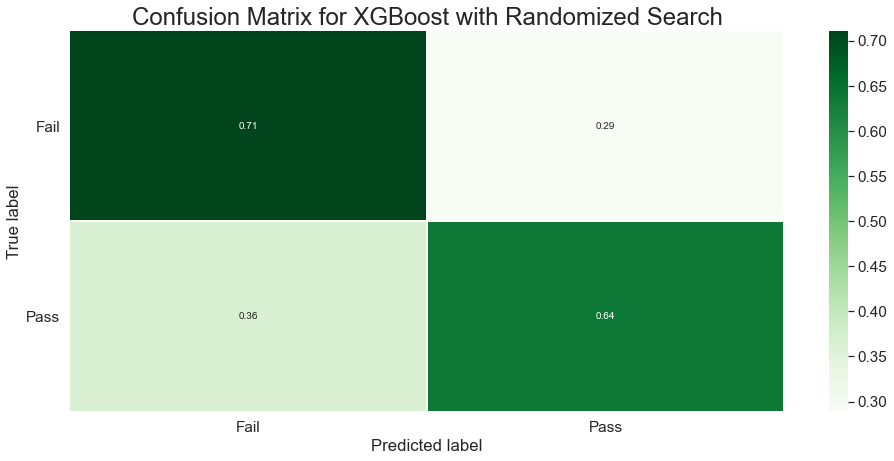

In [34]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_testB, y_predB)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fail','Pass']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost with Randomized Search', size=24)
plt.show()

In [35]:
# View the classification report for test data and predictions
print(classification_report(y_testB, y_predB))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1041
           1       0.67      0.64      0.65       959

    accuracy                           0.68      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.68      0.67      2000



In [36]:
feature_imp = pd.Series(model.best_estimator_.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

lunch_free/reduced                                0.335173
test preparation course                           0.130966
education                                         0.064078
race/ethnicity_group E                            0.056452
parental level of education_some high school      0.054043
gender_female                                     0.045770
parental level of education_master's degree       0.044440
race/ethnicity_group D                            0.039360
race/ethnicity_group B                            0.038800
parental level of education_some college          0.036284
parental level of education_bachelor's degree     0.035777
race/ethnicity_group C                            0.034319
parental level of education_high school           0.029668
race/ethnicity_group A                            0.029594
parental level of education_associate's degree    0.025276
gender_male                                       0.000000
lunch_standard                                    0.0000

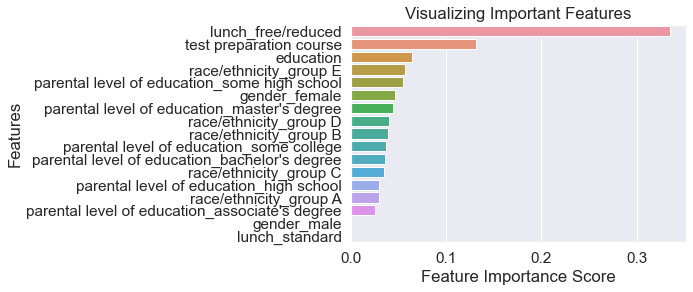

In [37]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Random Forest with Base Hyperparameters

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 66.9%


In [40]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

test preparation course                           0.198063
lunch_free/reduced                                0.163381
lunch_standard                                    0.144681
race/ethnicity_group E                            0.077647
education                                         0.051286
parental level of education_master's degree       0.040475
race/ethnicity_group D                            0.040433
gender_male                                       0.040137
gender_female                                     0.038801
parental level of education_some high school      0.036633
race/ethnicity_group B                            0.034433
race/ethnicity_group C                            0.030828
race/ethnicity_group A                            0.026015
parental level of education_bachelor's degree     0.023790
parental level of education_some college          0.020458
parental level of education_associate's degree    0.019215
parental level of education_high school           0.0137

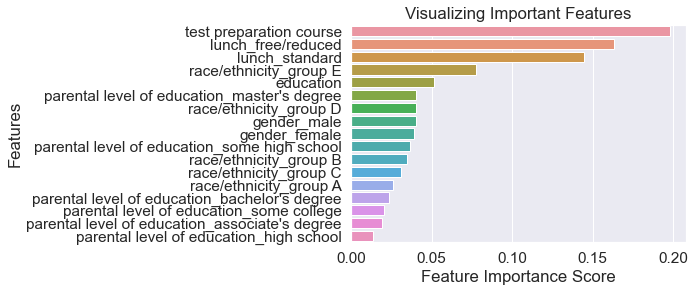

In [41]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Random Forest with RandomizedSearchCV

In [42]:
model_params = {
    'n_estimators': [100,200,400,600,800,1000],
    'max_features': ['auto','sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
}

In [43]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=3, random_state=42, n_jobs=-1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [44]:
feature_imp = pd.Series(model.best_estimator_.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

test preparation course                           0.206595
lunch_free/reduced                                0.171302
lunch_standard                                    0.147660
race/ethnicity_group E                            0.077844
education                                         0.054541
gender_female                                     0.038798
parental level of education_master's degree       0.038725
race/ethnicity_group D                            0.038478
gender_male                                       0.037705
parental level of education_some high school      0.035818
race/ethnicity_group B                            0.030759
race/ethnicity_group C                            0.028610
parental level of education_bachelor's degree     0.022123
race/ethnicity_group A                            0.019224
parental level of education_some college          0.019058
parental level of education_associate's degree    0.018574
parental level of education_high school           0.0141

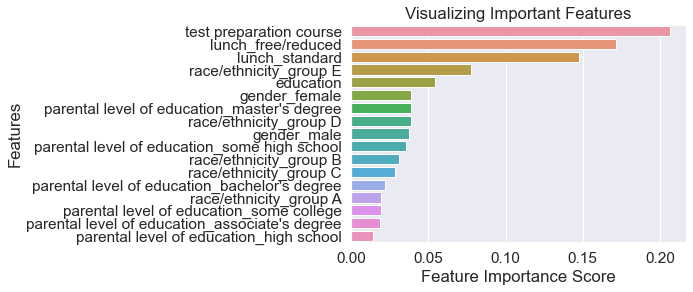

In [45]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [46]:
# generate predictions using the best-performing model
y_pred = model.predict(X_test)
print("Accuracy: {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 67.45%


In [47]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[734, 307],
       [344, 615]])

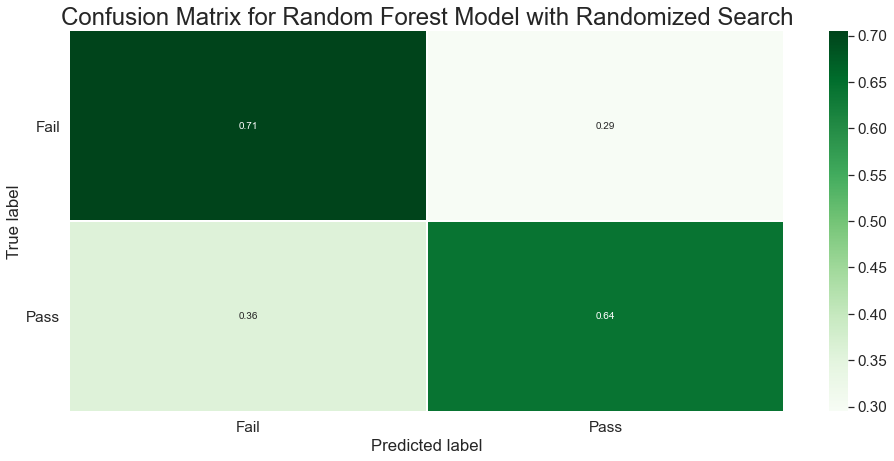

In [48]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Fail','Pass']
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model with Randomized Search', size=24)
plt.show()

In [49]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fail       0.68      0.71      0.69      1041
        pass       0.67      0.64      0.65       959

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

